# Import Libraries

In [1]:
import pandas as pd 
import numpy as np

### Read Csv Dataset

In [2]:
df = pd.read_csv("spam_sms.csv")

In [3]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
dataset = df.rename(columns = {'v1':"label", 'v2':"message"})

In [5]:
dataset

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
dataset.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
dataset['label'] = dataset['label'].map({'ham':0,'spam':1})

In [9]:
dataset

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Countplot for spam and ham as imbalanced data

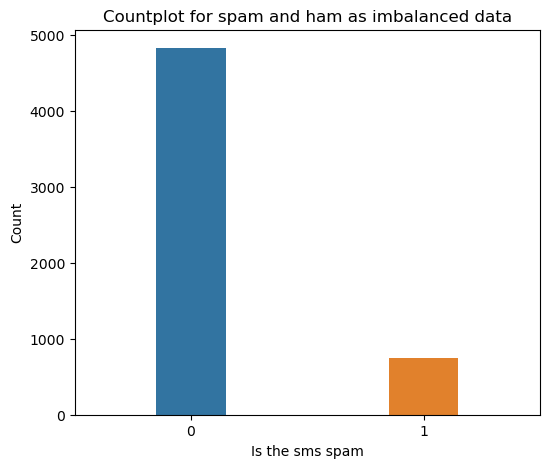

In [11]:
plt.figure(figsize=(6,5))
sns.countplot(x = 'label', data = dataset, width = 0.3)
plt.title("Countplot for spam and ham as imbalanced data")
plt.xlabel("Is the sms spam")
plt.ylabel("Count")
plt.show()


### Handling imbalanced data using Oversampling

In [12]:
only_spam = dataset[dataset['label'] == 1]

In [13]:
only_spam

,label,message
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [14]:
print("No. of Spam", len(only_spam))
print("No. of Ham", len(dataset) - len(only_spam))

No. of Spam 747
No. of Ham 4825


In [15]:
count = int((dataset.shape[0] - only_spam.shape[0])/ only_spam.shape[0])

In [16]:
count

6

In [17]:
for i in range(0,count-1):
    dataset = pd.concat([dataset, only_spam]) 
dataset.shape

(9307, 2)

### Countplot for spam and ham as balanced data

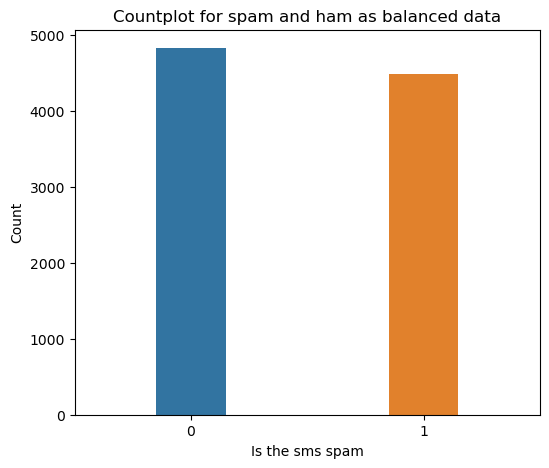

In [18]:
plt.figure(figsize=(6,5))
sns.countplot(x = 'label', data = dataset, width = 0.3)
plt.title("Countplot for spam and ham as balanced data")
plt.xlabel("Is the sms spam")
plt.ylabel("Count")
plt.show()

### Creating new feature word count

In [19]:
dataset['word_count'] = dataset['message'].apply(lambda x: len(x.split()))

In [20]:
dataset

,label,message,word_count
0,0,"Go until jurong point, crazy.. Available only ...",20
1,0,Ok lar... Joking wif u oni...,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,0,U dun say so early hor... U c already then say...,11
4,0,"Nah I don't think he goes to usf, he lives aro...",13
...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28


C:\Users\Dell\Documents\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\Documents\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


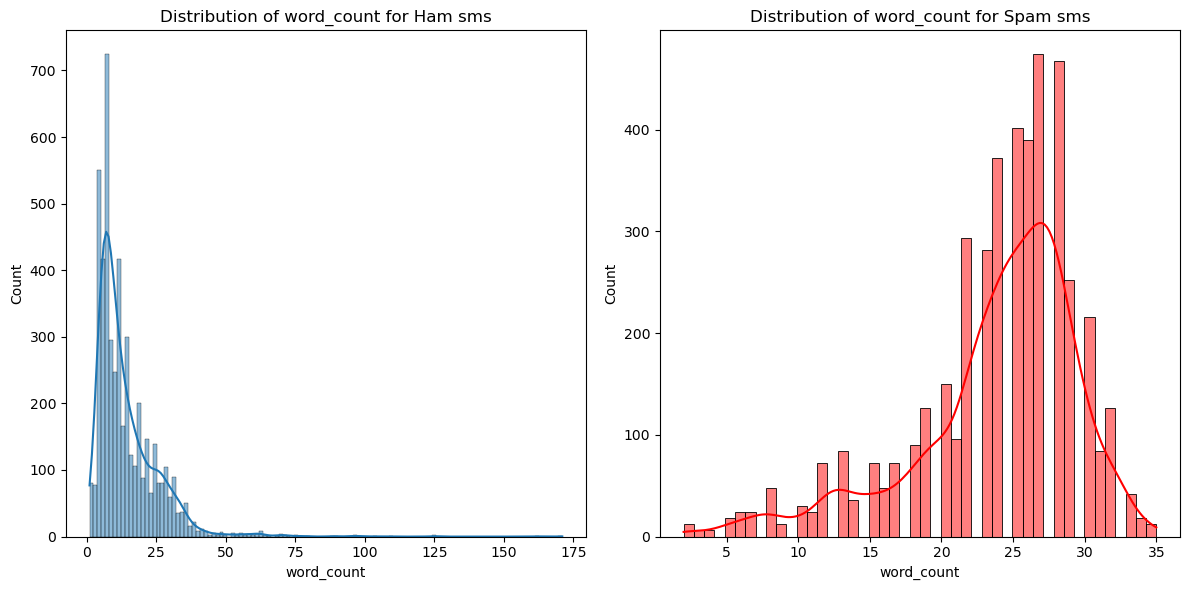

In [21]:
plt.figure(figsize = (12,6))

#(1,1)

plt.subplot(1,2,1)
sns.histplot(dataset[dataset['label'] == 0].word_count, kde = True)
plt.title("Distribution of word_count for Ham sms")

#(1,2)

plt.subplot(1,2,2)
sns.histplot(dataset[dataset["label"] == 1].word_count, kde = True, color = 'red')
plt.title("Distribution of word_count for Spam sms") 

plt.tight_layout()
plt.show()


### Creating new feature of contaning currency symbol

In [22]:
print(dataset.dtypes)

label          int64
message       object
word_count     int64
dtype: object


In [23]:
dataset['contains_currency_symbol'] = dataset['message'].astype(str)
dataset['label'] = dataset['label'].astype(str)

In [24]:
print(dataset['contains_currency_symbol'].unique())
print(dataset['label'].unique())


['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
 'Ok lar... Joking wif u oni...'
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
 ... 'Pity, * was in mood for that. So...any other suggestions?'
 "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free"
 'Rofl. Its true to its name']
['0' '1']


In [25]:
def currency(data):
    currency_symbol=['€','$','¥','£','₹']
    for i in currency_symbol:
        if i in data:
            return 1
    return 0

In [26]:
dataset['contains_currency_symbol'] = dataset['message'].apply(currency)

In [27]:
dataset

,label,message,word_count,contains_currency_symbol
0,0,"Go until jurong point, crazy.. Available only ...",20,0
1,0,Ok lar... Joking wif u oni...,6,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0
3,0,U dun say so early hor... U c already then say...,11,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0
...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0


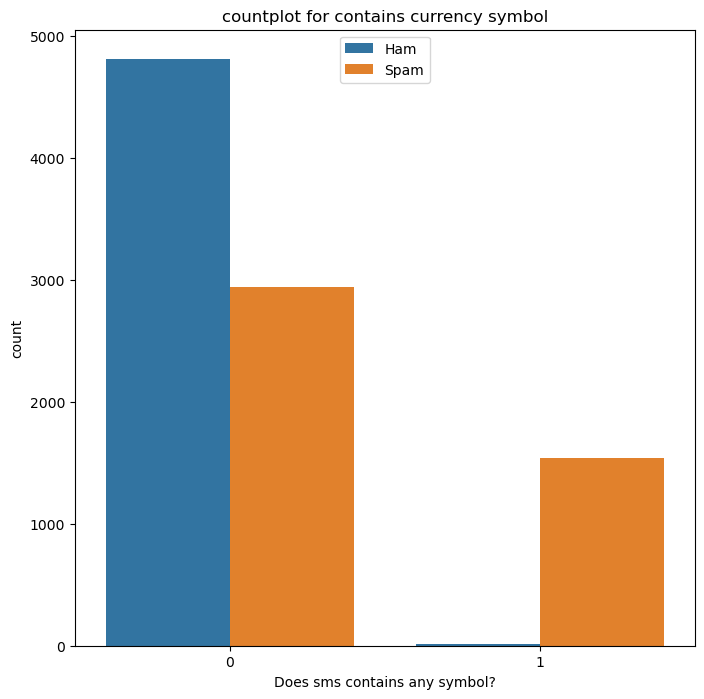

In [28]:
plt.figure(figsize=(8,8))
sns.countplot(x = 'contains_currency_symbol', data = dataset, hue = 'label')
plt.title("countplot for contains currency symbol")
plt.xlabel("Does sms contains any symbol?")
plt.ylabel("count")
plt.legend(labels = ["Ham", "Spam"], loc = 'upper center')
plt.show()

In [29]:
def number(data):
    for i in data:
        if ord(i) >= 48 and ord(i) <= 57:
            return 1
    return 0

In [30]:
dataset["contains_number"] = dataset["message"].apply(number)

In [31]:
dataset

,label,message,word_count,contains_currency_symbol,contains_number
0,0,"Go until jurong point, crazy.. Available only ...",20,0,0
1,0,Ok lar... Joking wif u oni...,6,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0,1
3,0,U dun say so early hor... U c already then say...,11,0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0,0
...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0,1
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0,1
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0,1


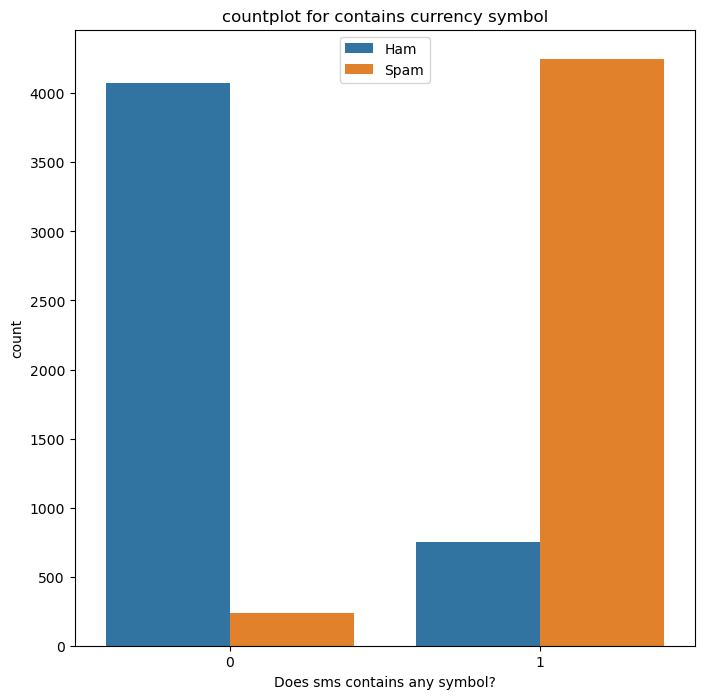

In [32]:
plt.figure(figsize=(8,8))
sns.countplot(x = 'contains_number', data = dataset, hue = 'label')
plt.title("countplot for contains currency symbol")
plt.xlabel("Does sms contains any symbol?")
plt.ylabel("count")
plt.legend(labels = ["Ham", "Spam"], loc = 'upper center')
plt.show()

In [33]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
le = LabelEncoder()

# Convert 'label' to integer labels
dataset['label'] = le.fit_transform(dataset['label'])


In [34]:
import nltk
import re
nltk.download("stopwords")
nltk.download("wordnet")
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [35]:
corpus = []
wnl = WordNetLemmatizer()

for sms in list(dataset.message):
    message = re.sub(pattern='[^a-zA-Z]', repl = ' ' ,string=sms)
    message = message.lower()
    words = message.split()
    filtered_words = [word for word in words if word not in set(stopwords.words("english"))]
    lemm_words = [wnl.lemmatize(word) for word in filtered_words]
    message = ' '.join(lemm_words)
    corpus.append(message)

In [36]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfv = TfidfVectorizer(max_features = 500)
vectors = tfv.fit_transform(corpus).toarray()
feature_names = tfv.get_feature_names_out()

In [38]:
X = pd.DataFrame(vectors, columns = feature_names)
y = dataset['label']

In [39]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 42, test_size = 0.2)

In [41]:
X_test

,ac,access,account,address,admirer,age,already,also,always,amp,...,xxx,ya,yeah,year,yes,yesterday,yet,yo,yr,yup
1155,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1790,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3003,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6489,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
592,0.0,0.0,0.303755,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
274,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1345,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8891,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
cv = cross_val_score(mnb, X, y, scoring = 'f1', cv = 10)
print(round(cv.mean(),3))
print(round(cv.std(),3))

0.944
0.004


In [43]:
mnb.fit(X_train,y_train)
y_pred = mnb.predict(X_test)

In [44]:
cl = classification_report(y_test,y_pred)
print(cl)

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       958
           1       0.94      0.94      0.94       904

    accuracy                           0.94      1862
   macro avg       0.94      0.94      0.94      1862
weighted avg       0.94      0.94      0.94      1862



In [45]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[908  50]
 [ 57 847]]


Text(20.72222222222222, 0.5, 'Predicted value')

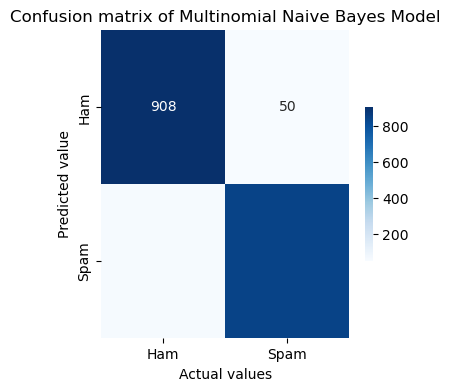

In [46]:
plt.figure(figsize=(4,4))
axis_labels = ['Ham','Spam']
sns.heatmap(data = cm,xticklabels = axis_labels,yticklabels = axis_labels,annot = True, fmt = 'g',cbar_kws = {"shrink": 0.5}, cmap = "Blues")
plt.title("Confusion matrix of Multinomial Naive Bayes Model")
plt.xlabel("Actual values")
plt.ylabel("Predicted value")

In [47]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
cv = cross_val_score(dt, X, y, scoring = 'f1', cv = 10)
print(round(cv.mean(),3))
print(round(cv.std(),3))

0.98
0.004


In [48]:
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

In [49]:
cl = classification_report(y_test,y_pred)
print(cl)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       958
           1       0.97      1.00      0.98       904

    accuracy                           0.98      1862
   macro avg       0.98      0.98      0.98      1862
weighted avg       0.98      0.98      0.98      1862



In [50]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[926  32]
 [  3 901]]


Text(20.72222222222222, 0.5, 'Predicted value')

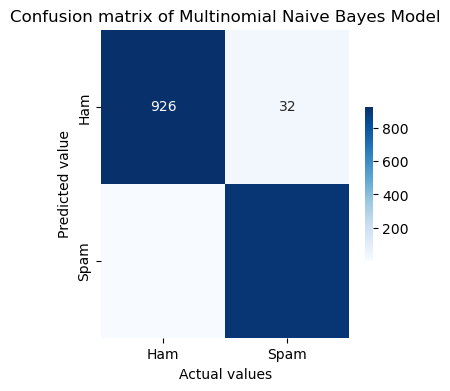

In [51]:
plt.figure(figsize=(4,4))
axis_labels = ['Ham','Spam']
sns.heatmap(data = cm,xticklabels = axis_labels,yticklabels = axis_labels,annot = True, fmt = 'g',cbar_kws = {"shrink": 0.5}, cmap = "Blues")
plt.title("Confusion matrix of Multinomial Naive Bayes Model")
plt.xlabel("Actual values")
plt.ylabel("Predicted value")

In [52]:
def predict_spam(sms):
    message = re.sub(pattern='[^a-zA-Z]', repl = ' ' ,string=sms)
    message = message.lower()
    words = message.split()
    filtered_words = [word for word in words if word not in set(stopwords.words("english"))]
    lemm_words = [wnl.lemmatize(word) for word in filtered_words]
    message = ' '.join(lemm_words)
    temp = tfv.transform([message]).toarray()
    return dt.predict(temp)

### Prediction 1

In [53]:
sample_msg = 'Important - you could be entitled up to ₹60,000 win the lottery ticket'
if predict_spam(sample_msg):
    print("This is spam message")
else:
    print("This is ham message")

This is ham message


C:\Users\Dell\Documents\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### Prediction 2

In [54]:
sample_msg = 'I have never send you a spam message'
if predict_spam(sample_msg):
    print("This is spam message")
else:
    print("This is ham message")

This is ham message


C:\Users\Dell\Documents\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
